In [1]:
# Push, pull, and edit test: Alihan Ince

In [2]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses1-19/House19-1m.csv')
df.set_index('timestamp', inplace = True)
df.index= pd.to_datetime(df.index)
df = df.resample('5T').mean()
df = df.loc['2020-04-01 04:00:00+02:00':'2020-04-15 03:59:00+02:00'] 
df
# df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
# df['Date'] = df['timestamp'].dt.date
# df["Date"] = df['Date'].astype(str)
# df = df.set_index('Date')
# df = df.loc['2019-04-01':'2019-04-08']
# df

,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,
2020-04-01 04:00:00+02:00,0.0,0.228,0.0,0.228,0.228
2020-04-01 04:05:00+02:00,0.0,0.324,0.0,0.324,0.324
2020-04-01 04:10:00+02:00,0.0,0.264,0.0,0.264,0.264
2020-04-01 04:15:00+02:00,0.0,0.240,0.0,0.240,0.240
2020-04-01 04:20:00+02:00,0.0,0.228,0.0,0.228,0.228
...,...,...,...,...,...
2020-04-15 03:35:00+02:00,0.0,0.204,0.0,0.204,0.204
2020-04-15 03:40:00+02:00,0.0,0.120,0.0,0.120,0.120
2020-04-15 03:45:00+02:00,0.0,0.144,0.0,0.144,0.144


In [4]:
# import_kw = df['IMPORT_KW']
# train_test_balance = len(df)//(8)
# train = list(import_kw)[train_test_balance:]
# test = list(import_kw)[:train_test_balance]

In [5]:
# import_kw = df['IMPORT_KW']
# train_test_balance = int(len(import_kw) * 0.832)
# train = list(import_kw)[:train_test_balance]
# test = list(import_kw)[train_test_balance:]

In [6]:
import_kw = df['IMPORT_KW']
len_test = len(import_kw)-(288)
train = list(import_kw)[:len_test]
test = list(import_kw)[(len_test-100):]

In [7]:
print(len(train))
print(len(test))

3744
388


Training

In [8]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

Model

In [10]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
114/114 [==============================] - 11s 80ms/step - loss: 0.1589 - mae: 0.2141
Epoch 2/5
114/114 [==============================] - 8s 72ms/step - loss: 0.0883 - mae: 0.1449
Epoch 3/5
114/114 [==============================] - 8s 70ms/step - loss: 0.0866 - mae: 0.1423
Epoch 4/5
114/114 [==============================] - 9s 77ms/step - loss: 0.0831 - mae: 0.1340
Epoch 5/5
114/114 [==============================] - 8s 74ms/step - loss: 0.0839 - mae: 0.1356


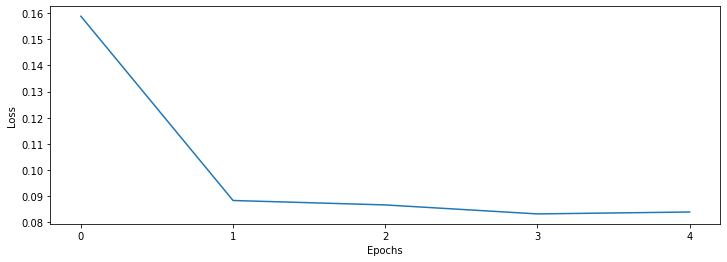

In [11]:
losses = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses)),losses)

In [12]:
y_pred_model = model.predict(X_train)

In [13]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.2864740694992546


Test

In [14]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [15]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [16]:
y_test_pred_model = model.predict(X_test)

In [17]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.2604450286125038


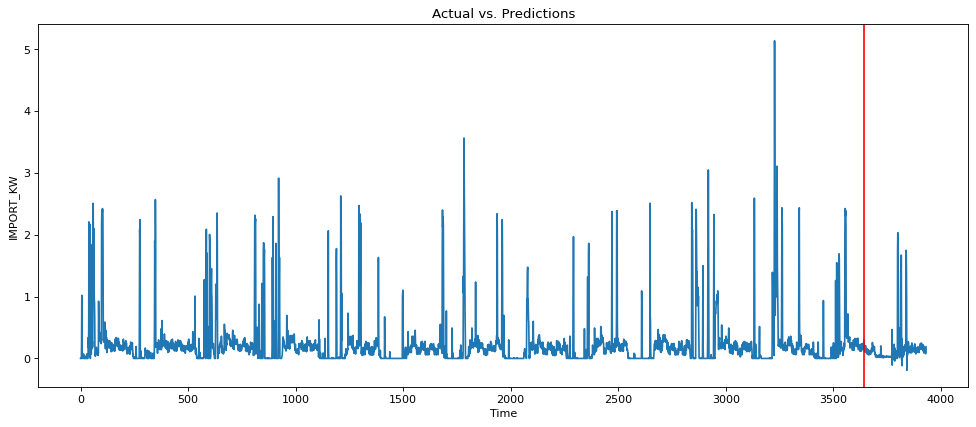

In [18]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    result = np.append(y_train, y_test_pred_model)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

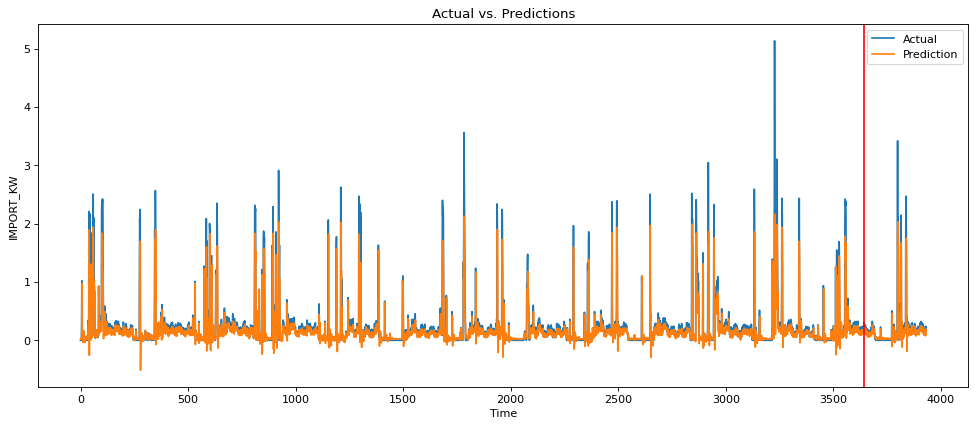

In [19]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [20]:
print(rmse_train)
print(rmse_test)

0.2864740694992546
0.2604450286125038


**Data to CSV**

In [21]:
test = import_kw[len_test:]
training = import_kw[:len_test]

#dfc = dfc.loc['2020-04-08 04:00:00+02:00':'2020-04-09 03:59:00+02:00'] 
print(training, test)

timestamp
2020-04-01 04:00:00+02:00    0.228
2020-04-01 04:05:00+02:00    0.324
2020-04-01 04:10:00+02:00    0.264
2020-04-01 04:15:00+02:00    0.240
2020-04-01 04:20:00+02:00    0.228
                             ...  
2020-04-14 03:35:00+02:00    0.204
2020-04-14 03:40:00+02:00    0.156
2020-04-14 03:45:00+02:00    0.180
2020-04-14 03:50:00+02:00    0.300
2020-04-14 03:55:00+02:00    0.216
Freq: 5T, Name: IMPORT_KW, Length: 3744, dtype: float64 timestamp
2020-04-14 04:00:00+02:00    0.144
2020-04-14 04:05:00+02:00    0.192
2020-04-14 04:10:00+02:00    0.204
2020-04-14 04:15:00+02:00    0.156
2020-04-14 04:20:00+02:00    0.144
                             ...  
2020-04-15 03:35:00+02:00    0.204
2020-04-15 03:40:00+02:00    0.120
2020-04-15 03:45:00+02:00    0.144
2020-04-15 03:50:00+02:00    0.240
2020-04-15 03:55:00+02:00    0.168
Freq: 5T, Name: IMPORT_KW, Length: 288, dtype: float64


In [22]:
data = y_test_pred_model
#data = data[288:]
df_prediction = pd.DataFrame(data, columns = ['RNN_prediction_IMPORT_KW'])
df_prediction['timestamp'] = pd.date_range(start=test.index[0], periods=len(df_prediction), freq='5T')
df_prediction.set_index('timestamp', inplace = True)
df_prediction.index= pd.to_datetime(df_prediction.index)
df_prediction

,RNN_prediction_IMPORT_KW
timestamp,
2020-04-14 04:00:00+02:00,0.156576
2020-04-14 04:05:00+02:00,0.115976
2020-04-14 04:10:00+02:00,0.142142
2020-04-14 04:15:00+02:00,0.160015
2020-04-14 04:20:00+02:00,0.127122
...,...
2020-04-15 03:35:00+02:00,0.151579
2020-04-15 03:40:00+02:00,0.164426
2020-04-15 03:45:00+02:00,0.075182


<AxesSubplot:xlabel='timestamp'>

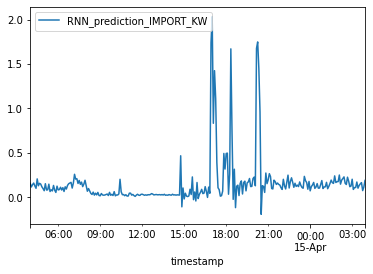

In [23]:
df_prediction.plot()

In [24]:
df_prediction.to_csv('IMPORT_KW_predictions.csv')

In [25]:
Import_prediction_24hours = pd.read_csv(r'IMPORT_KW_predictions.csv')
Import_prediction_24hours

,timestamp,RNN_prediction_IMPORT_KW
0,2020-04-14 04:00:00+02:00,0.156576
1,2020-04-14 04:05:00+02:00,0.115976
2,2020-04-14 04:10:00+02:00,0.142142
3,2020-04-14 04:15:00+02:00,0.160015
4,2020-04-14 04:20:00+02:00,0.127122
...,...,...
283,2020-04-15 03:35:00+02:00,0.151579
284,2020-04-15 03:40:00+02:00,0.164426
285,2020-04-15 03:45:00+02:00,0.075182
286,2020-04-15 03:50:00+02:00,0.114049
